# **World Happiness Report**

This dataset mainly focuses on the World Happiness Report from 2015 to 2020. The information that will be included in this dataset are:
   - country
   - region
   - year
   - happiness score
   - influence of GDP on the happiness score (gdp_hscore)
   - influence of life expectancy on the happiness score (lifeexp_hscore)
   - influence of freedom on the happiness score (freedom_hscore)
   - influence of generosity on the happiness score (generosity_hscore)
   - influence of corruption on the happiness score (corruption_hscore)
   - actual GDP (actual_gdpinfluence of GDP on the happiness score)
   - actual life expectancy (actual_lifeexp)
   - actual crime rate (actual_crime)

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import geopandas as gpd
import seaborn as sns

## Opening CSV Files, Processing Data, and Merging of Dataframes

### World Happiness Report Data

In [2]:
#Opening of World Happiness Rankings CSV files per year and adding 'year' columns

# whr = []
# year = [2015, 2016, 2017, 2018, 2019, 2020]
# counter = 0

# for x in year:
#     fileyear = str(x)
#     whrtemp = pd.read_csv('whr/' + fileyear + '.csv')
#     whrtemp['year'] = x
#     whr.append(whrtemp)
#     counter = counter + 1
    
# whr.info()

whr2015 = pd.read_csv('whr/2015.csv')
whr2015['year'] = 2015

whr2016 = pd.read_csv('whr/2016.csv')
whr2016['year'] = 2016

whr2017 = pd.read_csv('whr/2017.csv')
whr2017['year'] = 2017

whr2018 = pd.read_csv('whr/2018.csv')
whr2018['year'] = 2018

whr2019 = pd.read_csv('whr/2019.csv')
whr2019['year'] = 2019

whr2020 = pd.read_csv('whr/2020.csv')
whr2020['year'] = 2020


In [3]:
del whr2015['Region']
del whr2015['Happiness Rank']
del whr2015['Dystopia Residual']
del whr2015['Family']
del whr2015['Standard Error']

del whr2016['Region']
del whr2016['Happiness Rank']
del whr2016['Dystopia Residual']
del whr2016['Family']
del whr2016['Lower Confidence Interval']
del whr2016['Upper Confidence Interval']

del whr2017['Happiness.Rank']
del whr2017['Dystopia.Residual']
del whr2017['Family']
del whr2017['Whisker.high']
del whr2017['Whisker.low']

del whr2018['Overall rank']
del whr2018['Social support']

del whr2019['Overall rank']
del whr2019['Social support']

del whr2020['Rank']
del whr2020['Standard error of ladder score']
del whr2020['upperwhisker']
del whr2020['lowerwhisker']
del whr2020['Logged GDP per capita']
del whr2020['Social support']
del whr2020['Healthy life expectancy']
del whr2020['Freedom to make life choices']
del whr2020['Generosity']
del whr2020['Perceptions of corruption']
del whr2020['Ladder score in Dystopia']
del whr2020['Dystopia + residual']
del whr2020['Explained by: Social support']

In [4]:
#Renaming columns

whr2015 = whr2015.rename(columns={'Country':'country', 'Happiness Score':'happiness_score','Economy (GDP per Capita)':'gdp_hscore',
                                  'Health (Life Expectancy)':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust (Government Corruption)':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2016 = whr2016.rename(columns={'Country':'country', 'Happiness Score':'happiness_score', 'Economy (GDP per Capita)':'gdp_hscore',
                                  'Health (Life Expectancy)':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust (Government Corruption)':'corruption_hscore','Generosity':'generosity_hscore'})

whr2017 = whr2017.rename(columns={'Country':'country', 'Happiness.Score':'happiness_score', 'Economy..GDP.per.Capita.':'gdp_hscore',
                                  'Health..Life.Expectancy.':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust..Government.Corruption.':'corruption_hscore','Generosity':'generosity_hscore'})

whr2018 = whr2018.rename(columns={'Country or region':'country', 'Score':'happiness_score', 'GDP per capita':'gdp_hscore',
                                  'Healthy life expectancy':'lifeexp_hscore', 'Freedom to make life choices':'freedom_hscore', 
                                  'Perceptions of corruption':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2019 = whr2019.rename(columns={'Country or region':'country', 'Score':'happiness_score', 'GDP per capita':'gdp_hscore',
                                  'Healthy life expectancy':'lifeexp_hscore', 'Freedom to make life choices':'freedom_hscore',
                                  'Perceptions of corruption':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2020 = whr2020.rename(columns={'Country name':'country', 'Regional indicator':'region', 'Ladder score':'happiness_score',
                                  'Explained by: Log GDP per capita':'gdp_hscore', 'Explained by: Healthy life expectancy':'lifeexp_hscore',
                                  'Explained by: Freedom to make life choices':'freedom_hscore', 
                                  'Explained by: Perceptions of corruption':'corruption_hscore',
                                  'Explained by: Generosity':'generosity_hscore'})

In [5]:
whrfinalCountries = pd.DataFrame(whr2020['country'])
whrfinalCountries['region'] = whr2020['region']
whrfinalCountries

,country,region
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Norway,Western Europe
...,...,...
139,Tanzania,Sub-Saharan Africa
140,Rwanda,Sub-Saharan Africa
141,Zimbabwe,Sub-Saharan Africa
142,South Sudan,Sub-Saharan Africa


In [6]:
whr2015final = whr2015[whr2015.country.isin(whrfinalCountries.country)]
whr2015final = pd.merge(whr2015final, whrfinalCountries, on='country', how='left')

whr2016final = whr2016[whr2016.country.isin(whrfinalCountries.country)]
whr2016final = pd.merge(whr2016final, whrfinalCountries, on='country', how='left')

whr2017final = whr2017[whr2017.country.isin(whrfinalCountries.country)]
whr2017final = pd.merge(whr2017final, whrfinalCountries, on='country', how='left')

whr2018final = whr2018[whr2018.country.isin(whrfinalCountries.country)]
whr2018final = pd.merge(whr2018final, whrfinalCountries, on='country', how='left')

whr2019final = whr2019[whr2019.country.isin(whrfinalCountries.country)]
whr2019final = pd.merge(whr2019final, whrfinalCountries, on='country', how='left')

whr2020final = whr2020[whr2020.country.isin(whrfinalCountries.country)]

In [7]:
whrfinal = whr2020final
whrfinal = whrfinal.append(whr2016final, ignore_index = True)
whrfinal = whrfinal.append(whr2017final, ignore_index = True)
whrfinal = whrfinal.append(whr2018final, ignore_index = True)
whrfinal = whrfinal.append(whr2019final, ignore_index = True)
whrfinal = whrfinal.append(whr2015final, ignore_index = True)

whrfinal = whrfinal.sort_values(['country','year'], ignore_index=False)
whrfinal = whrfinal[['country', 'region', 'year', 'happiness_score', 'gdp_hscore', 'lifeexp_hscore', 'freedom_hscore',
                     'generosity_hscore', 'corruption_hscore']]

whrfinal

,country,region,year,happiness_score,gdp_hscore,lifeexp_hscore,freedom_hscore,generosity_hscore,corruption_hscore
859,Afghanistan,South Asia,2015,3.5750,0.319820,0.303350,0.234140,0.365100,0.097190
285,Afghanistan,South Asia,2016,3.3600,0.382270,0.173440,0.164300,0.312680,0.071120
419,Afghanistan,South Asia,2017,3.7940,0.401477,0.180747,0.106180,0.311871,0.061158
566,Afghanistan,South Asia,2018,3.6320,0.332000,0.255000,0.085000,0.191000,0.036000
718,Afghanistan,South Asia,2019,3.2030,0.350000,0.361000,0.000000,0.158000,0.025000
...,...,...,...,...,...,...,...,...,...
265,Zimbabwe,Sub-Saharan Africa,2016,4.1930,0.350410,0.159500,0.254290,0.185030,0.085820
418,Zimbabwe,Sub-Saharan Africa,2017,3.8750,0.375847,0.196764,0.336384,0.189143,0.095375
565,Zimbabwe,Sub-Saharan Africa,2018,3.6920,0.357000,0.248000,0.406000,0.132000,0.099000
711,Zimbabwe,Sub-Saharan Africa,2019,3.6630,0.366000,0.433000,0.361000,0.151000,0.089000


### Actual Values Data

#### GDP

In [8]:
GDPdata = pd.read_csv('GDPactual.csv')
GDPdata = GDPdata.rename(columns={'Country Name': 'country'})
GDPdata.head()

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,578.4663529,509.2201005,519.8889126,493.7565814,507.1033919,508.8084095
1,Albania,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
2,Algeria,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
3,American Samoa,12059.63516,12038.2497,11003.82976,11557.67116,11534.56754,..
4,Andorra,35770.7767,37475.63506,38964.90448,41791.96984,40897.33087,..


In [9]:
actualGDP = GDPdata[GDPdata.country.isin(whrfinalCountries.country)]
actualGDP

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,578.4663529,509.2201005,519.8889126,493.7565814,507.1033919,508.8084095
1,Albania,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
2,Algeria,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
7,Argentina,13789.06042,12790.24247,14613.04182,11633.49801,9912.281809,8441.919439
8,Armenia,3607.289299,3591.828052,3914.527854,4220.540321,4622.738182,4267.452119
...,...,...,...,...,...,...,...
207,Uruguay,15613.74597,16715.63347,18690.89384,18703.86029,17688.01501,15438.41167
208,Uzbekistan,2615.025134,2567.799207,1826.566919,1529.082864,1719.05721,1685.764947
211,Vietnam,2085.101349,2192.174482,2365.521615,2566.447487,2715.27598,2785.724157
215,Zambia,1338.290927,1280.806543,1535.196574,1516.3711,1305.002214,1050.919283


#### Life Expectancy

In [10]:
lifedata = pd.read_csv('LifeExpAct.csv')
del lifedata['2020']
lifedata = lifedata.rename(columns={'Country Name': 'country'})
lifedata.head()

,country,2015,2016,2017,2018,2019
0,Afghanistan,63.377,63.763,64.13,64.486,64.833
1,Albania,78.025,78.194,78.333,78.458,78.573
2,Algeria,76.09,76.298,76.499,76.693,76.88
3,American Samoa,..,..,..,..,..
4,Andorra,..,..,..,..,..


In [11]:
actualLife = lifedata[lifedata.country.isin(whrfinalCountries.country)]
actualLife

,country,2015,2016,2017,2018,2019
0,Afghanistan,63.377,63.763,64.13,64.486,64.833
1,Albania,78.025,78.194,78.333,78.458,78.573
2,Algeria,76.09,76.298,76.499,76.693,76.88
7,Argentina,76.068,76.221,76.372,76.52,76.667
8,Armenia,74.467,74.64,74.797,74.945,75.087
...,...,...,...,...,...,...
207,Uruguay,77.369,77.498,77.632,77.77,77.911
208,Uzbekistan,70.928,71.171,71.388,71.573,71.725
211,Vietnam,75.11,75.172,75.241,75.317,75.4
215,Zambia,61.737,62.464,63.043,63.51,63.886


In [12]:
whr2020temp = pd.read_csv('whr/2020.csv')

life2020 = pd.DataFrame(whr2020['country'])
life2020['2020'] = whr2020temp['Healthy life expectancy']
life2020

,country,2020
0,Finland,71.900825
1,Denmark,72.402504
2,Switzerland,74.102448
3,Iceland,73.000000
4,Norway,73.200783
...,...,...
139,Tanzania,57.496075
140,Rwanda,61.098846
141,Zimbabwe,55.617260
142,South Sudan,51.000000


In [13]:
actualLife = pd.merge(actualLife, life2020, on='country', how='left')
actualLife

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,63.377,63.763,64.13,64.486,64.833,52.590000
1,Albania,78.025,78.194,78.333,78.458,78.573,68.708138
2,Algeria,76.09,76.298,76.499,76.693,76.88,65.905174
3,Argentina,76.068,76.221,76.372,76.52,76.667,68.803802
4,Armenia,74.467,74.64,74.797,74.945,75.087,66.750656
...,...,...,...,...,...,...,...
123,Uruguay,77.369,77.498,77.632,77.77,77.911,69.002548
124,Uzbekistan,70.928,71.171,71.388,71.573,71.725,65.107574
125,Vietnam,75.11,75.172,75.241,75.317,75.4,67.952736
126,Zambia,61.737,62.464,63.043,63.51,63.886,55.299377


#### Crime Rate

In [14]:
crime2015 = pd.read_csv('crime_index/2015.csv')
crime2016 = pd.read_csv('crime_index/2016.csv')
crime2017 = pd.read_csv('crime_index/2017.csv')
crime2018 = pd.read_csv('crime_index/2018.csv')
crime2019 = pd.read_csv('crime_index/2019.csv')
crime2020 = pd.read_csv('crime_index/2020.csv')

del crime2015['Rank']
del crime2016['Rank']
del crime2017['Rank']
del crime2018['Rank']
del crime2019['Rank']
del crime2020['Rank']

crime2015 = crime2015.rename(columns={'Country':'country', 'Crime Index': '2015'})
crime2016 = crime2016.rename(columns={'Country':'country', 'Crime Index': '2016'})
crime2017 = crime2017.rename(columns={'Country':'country', 'Crime Index': '2017'})
crime2018 = crime2018.rename(columns={'Country':'country', 'Crime Index': '2018'})
crime2019 = crime2019.rename(columns={'Country':'country', 'Crime Index': '2019'})
crime2020 = crime2020.rename(columns={'Country':'country', 'Crime Index': '2020'})

crimeCountries = pd.DataFrame(whrfinalCountries['country'])
crimeCountries = pd.merge(crimeCountries, crime2015, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2016, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2017, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2018, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2019, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2020, on='country', how='left')

crimeCountries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  144 non-null    object 
 1   2015     119 non-null    float64
 2   2016     105 non-null    float64
 3   2017     108 non-null    float64
 4   2018     104 non-null    float64
 5   2019     106 non-null    float64
 6   2020     110 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.0+ KB


In [15]:
actualGDP = pd.melt(actualGDP, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'],
                    var_name = 'year', value_name = 'actual_gdp')
actualGDP.sort_values(['country', 'year'], ignore_index=False, inplace=True)
actualGDP['year'] = pd.to_numeric(actualGDP['year'], errors="coerce")

actualLife = pd.melt(actualLife, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'], 
                      var_name = 'year', value_name = 'actual_lifeexp')
actualLife.sort_values(['country', 'year'], ignore_index=False, inplace=True)
actualLife['year'] = pd.to_numeric(actualLife['year'], errors="coerce")

crimeCountries = pd.melt(crimeCountries, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'],
                         var_name = 'year', value_name = 'actual_crime')
crimeCountries.sort_values(['country', 'year'], ignore_index=False, inplace=True)
crimeCountries['year'] = pd.to_numeric(crimeCountries['year'], errors="coerce")

whrfinal = pd.merge(whrfinal, actualGDP, on=['country', 'year'], how='left')
whrfinal = pd.merge(whrfinal, actualLife, on=['country', 'year'], how='left')
whrfinal = pd.merge(whrfinal, crimeCountries, on=['country', 'year'], how='left')

whrfinal['actual_lifeexp'] = pd.to_numeric(whrfinal['actual_lifeexp'], errors='coerce')
whrfinal['actual_gdp'] = pd.to_numeric(whrfinal['actual_gdp'], errors='coerce')

whrfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            864 non-null    object 
 1   region             864 non-null    object 
 2   year               864 non-null    int64  
 3   happiness_score    864 non-null    float64
 4   gdp_hscore         864 non-null    float64
 5   lifeexp_hscore     864 non-null    float64
 6   freedom_hscore     864 non-null    float64
 7   generosity_hscore  864 non-null    float64
 8   corruption_hscore  864 non-null    float64
 9   actual_gdp         758 non-null    float64
 10  actual_lifeexp     768 non-null    float64
 11  actual_crime       652 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 87.8+ KB


## Final Dataframe

In [16]:
whrfinal

,country,region,year,happiness_score,gdp_hscore,lifeexp_hscore,freedom_hscore,generosity_hscore,corruption_hscore,actual_gdp,actual_lifeexp,actual_crime
0,Afghanistan,South Asia,2015,3.5750,0.319820,0.303350,0.234140,0.365100,0.097190,578.466353,63.37700,77.34
1,Afghanistan,South Asia,2016,3.3600,0.382270,0.173440,0.164300,0.312680,0.071120,509.220101,63.76300,NaN
2,Afghanistan,South Asia,2017,3.7940,0.401477,0.180747,0.106180,0.311871,0.061158,519.888913,64.13000,73.85
3,Afghanistan,South Asia,2018,3.6320,0.332000,0.255000,0.085000,0.191000,0.036000,493.756581,64.48600,NaN
4,Afghanistan,South Asia,2019,3.2030,0.350000,0.361000,0.000000,0.158000,0.025000,507.103392,64.83300,76.63
...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zimbabwe,Sub-Saharan Africa,2016,4.1930,0.350410,0.159500,0.254290,0.185030,0.085820,1464.588957,60.29400,60.02
860,Zimbabwe,Sub-Saharan Africa,2017,3.8750,0.375847,0.196764,0.336384,0.189143,0.095375,1335.665064,60.81200,53.46
861,Zimbabwe,Sub-Saharan Africa,2018,3.6920,0.357000,0.248000,0.406000,0.132000,0.099000,1352.162653,61.19500,54.56
862,Zimbabwe,Sub-Saharan Africa,2019,3.6630,0.366000,0.433000,0.361000,0.151000,0.089000,1156.154864,61.49000,51.80


## EDA

### Top 50

In [27]:
rank = []

for x in range(1, 145):
    rank.append(x)

top50_2015 = whrfinal.loc[whrfinal['year'] == 2015].copy()
top50_2015.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2015['rank'] = rank
top50_2015 = top50_2015[['rank', 'country', 'region']][0:50]

top50_2016 = whrfinal.loc[whrfinal['year'] == 2016].copy()
top50_2016.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2016['rank'] = rank
top50_2016 = top50_2016[['rank', 'country', 'region']][0:50]

top50_2017 = whrfinal.loc[whrfinal['year'] == 2017].copy()
top50_2017.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2017['rank'] = rank
top50_2017 = top50_2017[['rank', 'country', 'region']][0:50]

top50_2018 = whrfinal.loc[whrfinal['year'] == 2018].copy()
top50_2018.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2018['rank'] = rank
top50_2018 = top50_2018[['rank', 'country', 'region']][0:50]

top50_2019 = whrfinal.loc[whrfinal['year'] == 2019].copy()
top50_2019.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2019['rank'] = rank
top50_2019 = top50_2019[['rank', 'country', 'region']][0:50]

top50_2020 = whrfinal.loc[whrfinal['year'] == 2020].copy()
top50_2020.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2020['rank'] = rank
top50_2020 = top50_2020[['rank', 'country', 'region']][0:50]

In [31]:
top50_2015 = top50_2015.rename(columns={'country':'2015_country', 'region':'2015_region'})
top50_2016 = top50_2016.rename(columns={'country':'2016_country', 'region':'2016_region'})
top50_2017 = top50_2017.rename(columns={'country':'2017_country', 'region':'2017_region'})
top50_2018 = top50_2018.rename(columns={'country':'2018_country', 'region':'2018_region'})
top50_2019 = top50_2019.rename(columns={'country':'2019_country', 'region':'2019_region'})
top50_2020 = top50_2020.rename(columns={'country':'2020_country', 'region':'2020_region'})

top50 = pd.merge(top50_2015, top50_2016, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2017, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2018, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2019, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2020, on=['rank'], how='left')

top50.head()

,rank,2015_country,2015_region,2016_country,2016_region,2017_country,2017_region,2018_country,2018_region,2019_country,2019_region,2020_country,2020_region
0,1,Switzerland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Finland,Western Europe,Finland,Western Europe,Finland,Western Europe
1,2,Iceland,Western Europe,Switzerland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Denmark,Western Europe,Denmark,Western Europe
2,3,Denmark,Western Europe,Iceland,Western Europe,Iceland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Switzerland,Western Europe
3,4,Norway,Western Europe,Norway,Western Europe,Switzerland,Western Europe,Iceland,Western Europe,Iceland,Western Europe,Iceland,Western Europe
4,5,Canada,North America and ANZ,Finland,Western Europe,Finland,Western Europe,Switzerland,Western Europe,Netherlands,Western Europe,Norway,Western Europe


### Choropleth Map

In [36]:
replacenames = whrfinal
replacenames.replace('United States','United States of America',inplace=True)
replacenames.replace('Bosnia and Herzegovina','Bosnia and Herz.',inplace=True)
replacenames.replace('Congo (Brazzaville)','Congo',inplace=True)
replacenames.replace('Congo (Kinshasa)','Dem. Rep. Congo',inplace=True)
replacenames.replace('Dominican Republic','Dominican Rep.',inplace=True)
replacenames.replace('Ivory Coast','CÃ´te d\'Ivoire',inplace=True)
replacenames.replace('Palestinian Territories','Palestine',inplace=True)
replacenames.replace('South Sudan','S. Sudan',inplace=True)

replacenames['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herz.',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Dem. Rep. Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Rep.', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       "CÃ´te d'Ivoire", 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia',
       'Mad

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name':'country'})
for_plotting = pd.merge(world, replacenames, on=['country'], how='left')

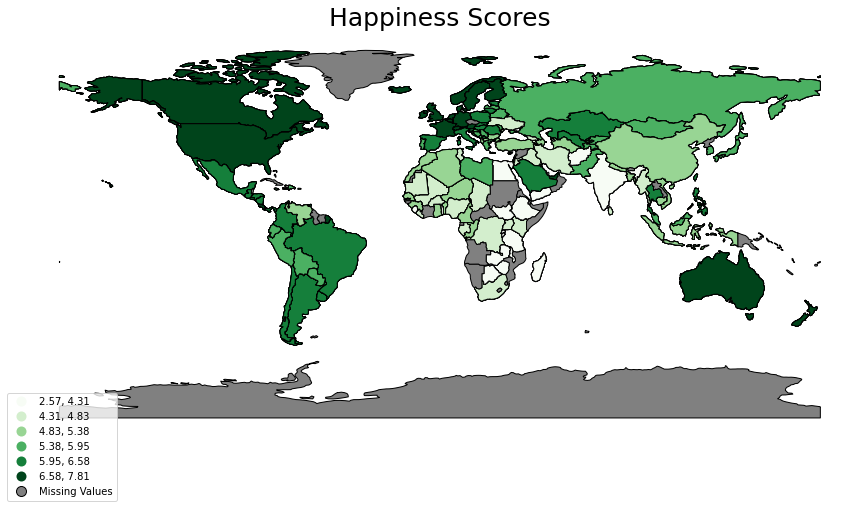

In [52]:
cmHS = for_plotting.plot(column='happiness_score', cmap='Greens', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);
#add title to the map
cmHS.set_title('Happiness Scores', fontdict={'fontsize':25})

#remove axes
cmHS.set_axis_off()

#move legend to an empty space
cmHS.get_legend().set_bbox_to_anchor((.12,.12))

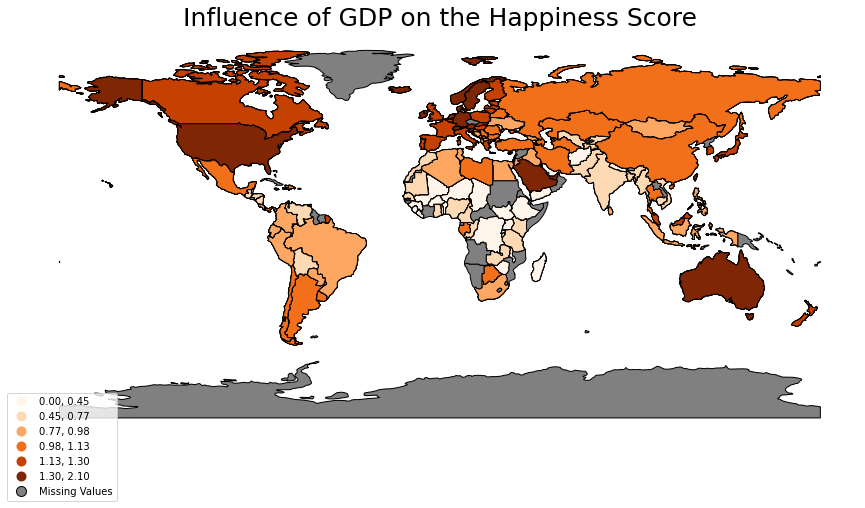

In [53]:
cmGDP = for_plotting.plot(column='gdp_hscore', cmap='Oranges', figsize=(15,9),
                           scheme='quantiles', k=6, edgecolor='black',
                           missing_kwds={"color": "grey", "label": "Missing Values"}, legend = True);

#add title to the map
cmGDP.set_title('Influence of GDP on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmGDP.set_axis_off()

#move legend to an empty space
cmGDP.get_legend().set_bbox_to_anchor((.12,.12))

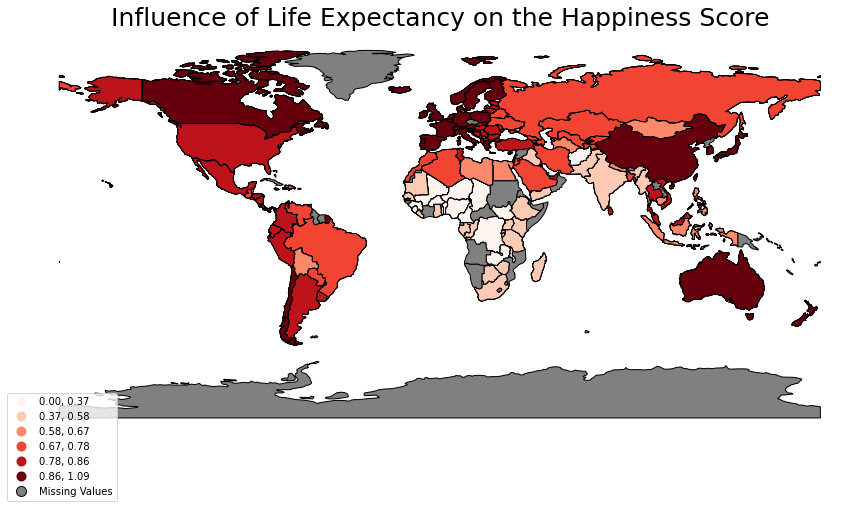

In [60]:
cmLE = for_plotting.plot(column='lifeexp_hscore', cmap='Reds', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmLE.set_title('Influence of Life Expectancy on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmLE.set_axis_off()

#move legend to an empty space
cmLE.get_legend().set_bbox_to_anchor((.12,.12))

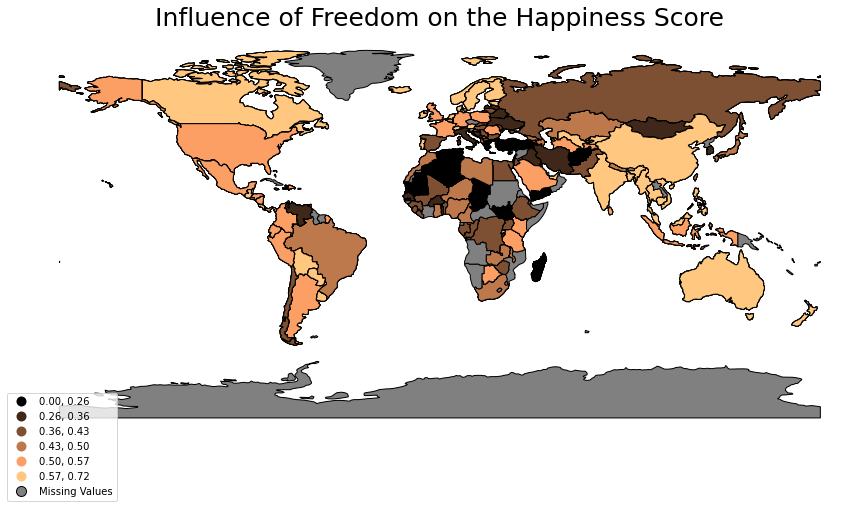

In [61]:
cmF = for_plotting.plot(column='freedom_hscore', cmap='copper', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey","label": "Missing Values"},legend = True);

#add title to the map
cmF.set_title('Influence of Freedom on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmF.set_axis_off()

#move legend to an empty space
cmF.get_legend().set_bbox_to_anchor((.12,.12))

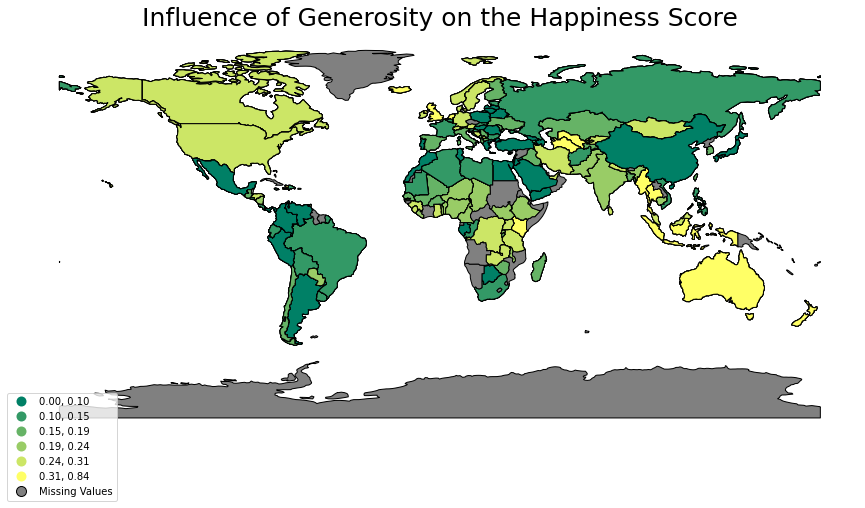

In [62]:
cmG = for_plotting.plot(column='generosity_hscore', cmap='summer', figsize=(15,9),
                        scheme='quantiles', k=6, edgecolor='black',
                        missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmG.set_title('Influence of Generosity on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmG.set_axis_off()

#move legend to an empty space
cmG.get_legend().set_bbox_to_anchor((.12,.12))

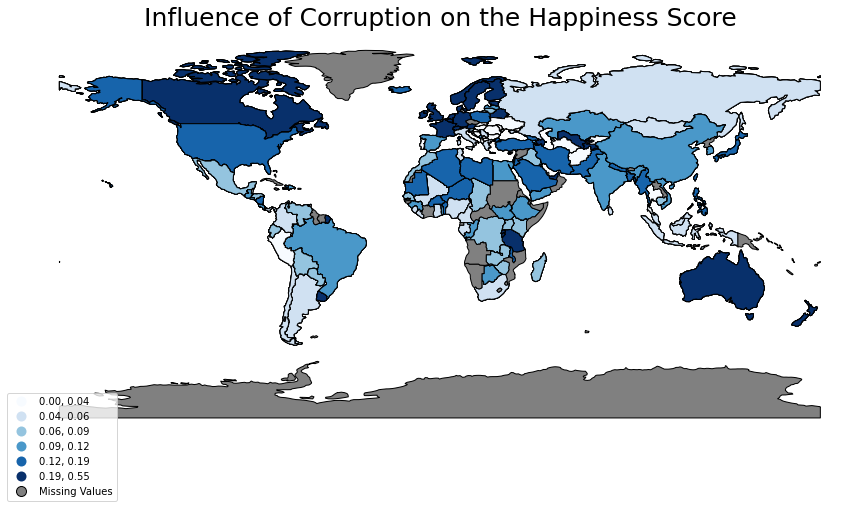

In [64]:
cmC = for_plotting.plot(column='corruption_hscore', cmap='Blues', figsize=(15,9),   
                        scheme='quantiles', k=6, edgecolor='black',
                        missing_kwds={"color": "grey","label": "Missing Values"},legend = True);

#add title to the map
cmC.set_title('Influence of Corruption on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmC.set_axis_off()

#move legend to an empty space
cmC.get_legend().set_bbox_to_anchor((.12,.12))

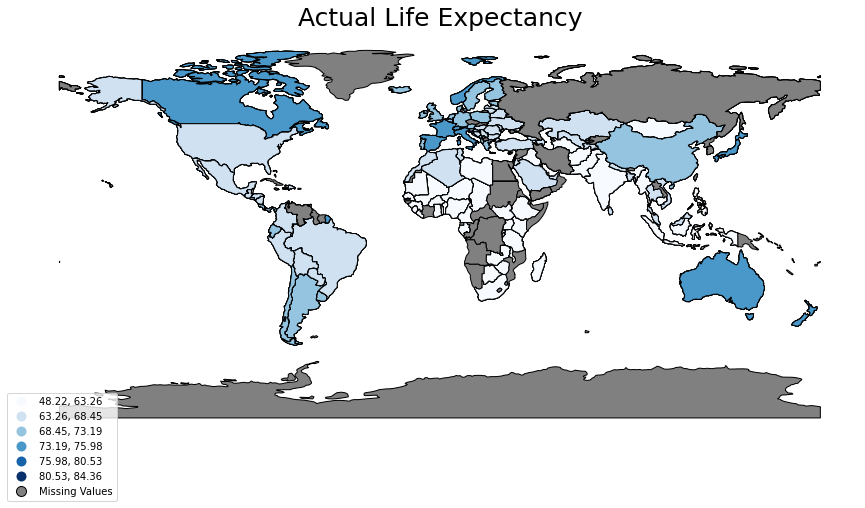

In [67]:
cmALE = for_plotting.plot(column='actual_lifeexp', cmap='Blues', figsize=(15,9),
                          scheme='quantiles', k=6, edgecolor='black', 
                          missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmALE.set_title('Actual Life Expectancy', fontdict={'fontsize':25})

#remove axes
cmALE.set_axis_off()

#move legend to an empty space
cmALE.get_legend().set_bbox_to_anchor((.12,.12))

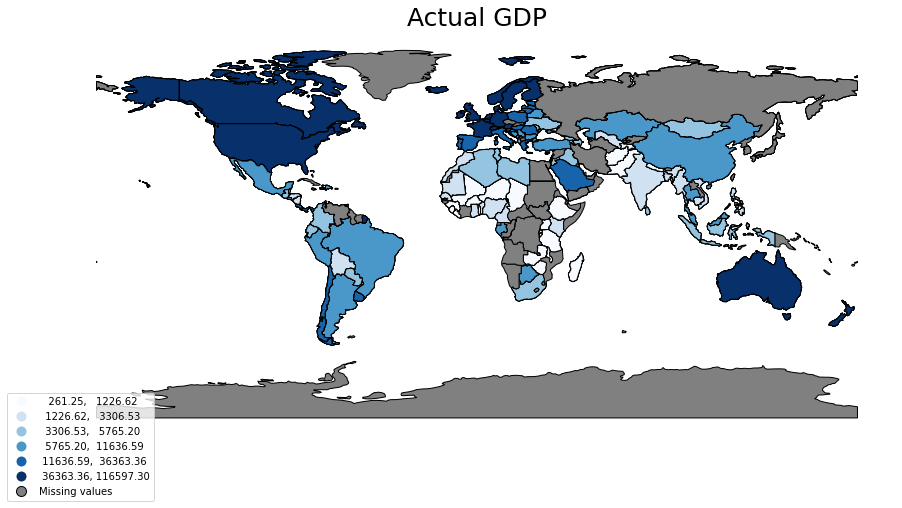

In [68]:
cmAGDP = for_plotting.plot(column='actual_gdp',cmap='Blues', figsize=(15,9), 
                           scheme='quantiles', k=6, edgecolor='black',  
                           missing_kwds={"color": "grey", "label": "Missing values"},legend = True);

#add title to the map
cmAGDP.set_title('Actual GDP', fontdict={'fontsize':25})

#remove axes
cmAGDP.set_axis_off()

#move legend to an empty space
cmAGDP.get_legend().set_bbox_to_anchor((.12,.12))

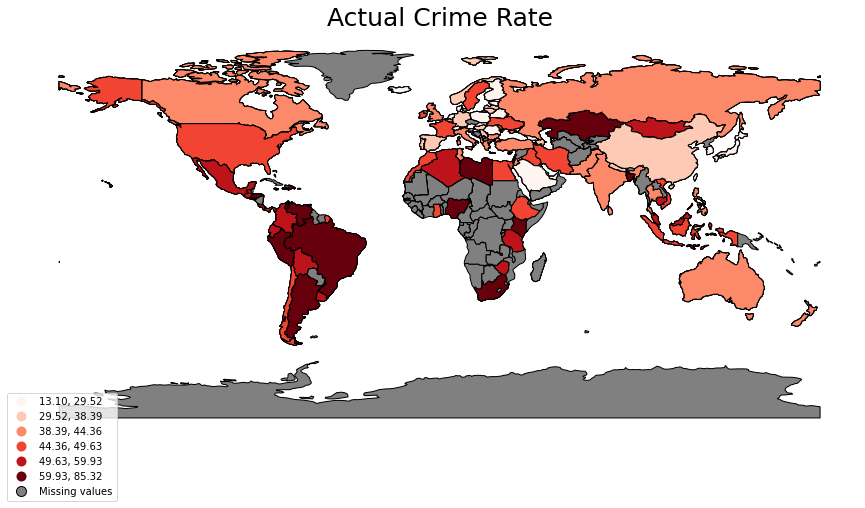

In [70]:
cmACR = for_plotting.plot(column='actual_crime', cmap='Reds', figsize=(15,9),
                          scheme='quantiles', k=6, edgecolor='black',
                          missing_kwds={"color": "grey", "label": "Missing values"},legend = True);

#add title to the map
cmACR.set_title('Actual Crime Rate', fontdict={'fontsize':25})

#remove axes
cmACR.set_axis_off()

#move legend to an empty space
cmACR.get_legend().set_bbox_to_anchor((.12,.12))

### Correlation

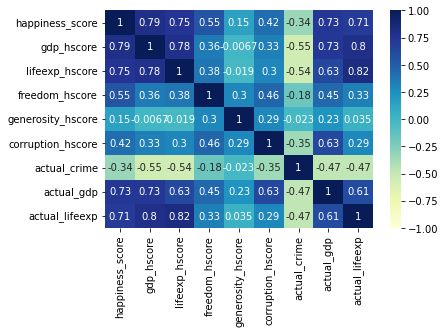

In [72]:
data_to_corr = whrfinal[['happiness_score', 'gdp_hscore', 'lifeexp_hscore', 'freedom_hscore', 'generosity_hscore', 
                         'corruption_hscore', 'actual_crime', 'actual_gdp', 'actual_lifeexp']]

data_corr_heatmap = sns.heatmap(data_to_corr.corr(), 
                                center=0, 
                                cmap="YlGnBu", 
                                annot=True, 
                                vmin=-1, 
                                vmax=1)

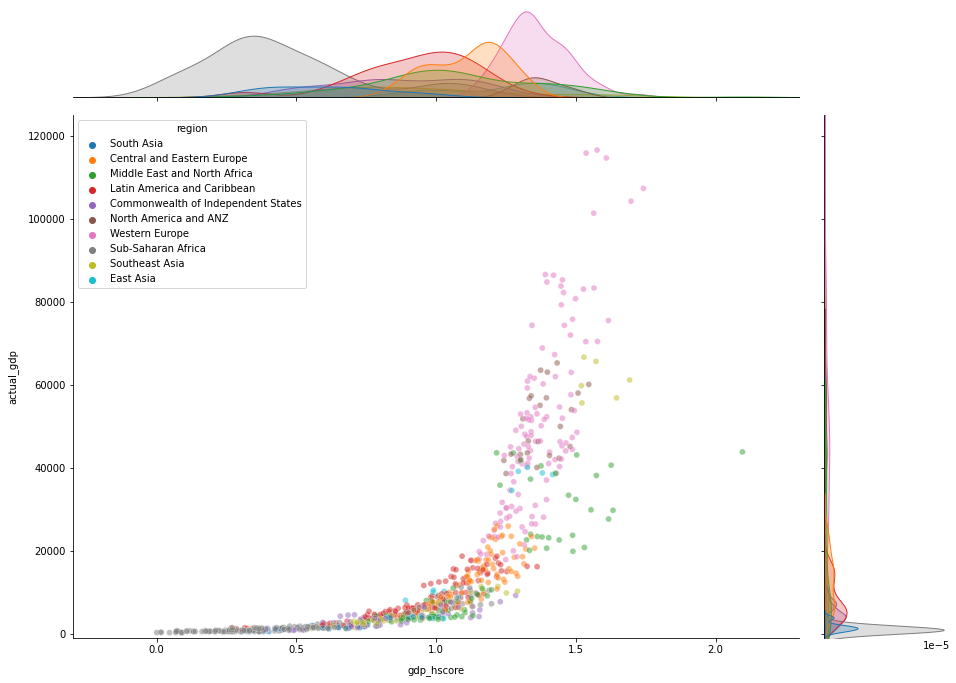

In [74]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="gdp_hscore", 
                           y="actual_gdp", 
                           hue="region",  
                           alpha=0.5, 
                           xlim = (-0.3, 2.3), 
                           ylim = (-1000, 125000))

data_to_sp.set_axis_labels("gdp_hscore", "actual_gdp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

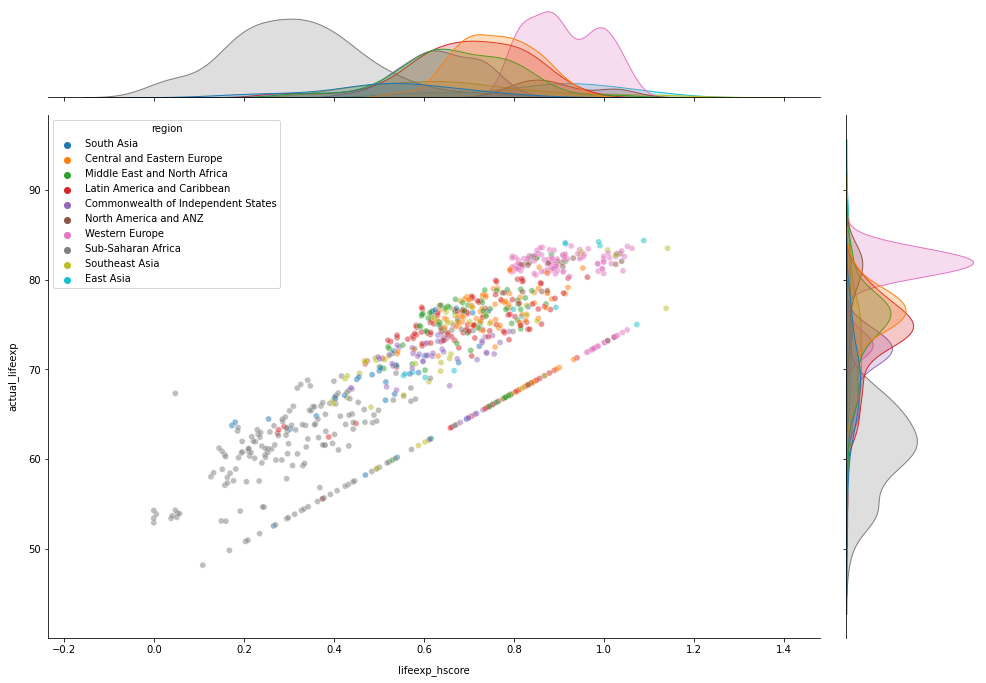

In [76]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="lifeexp_hscore", 
                           y="actual_lifeexp", 
                           hue="region",
                           alpha=0.5)

data_to_sp.set_axis_labels("lifeexp_hscore", "actual_lifeexp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

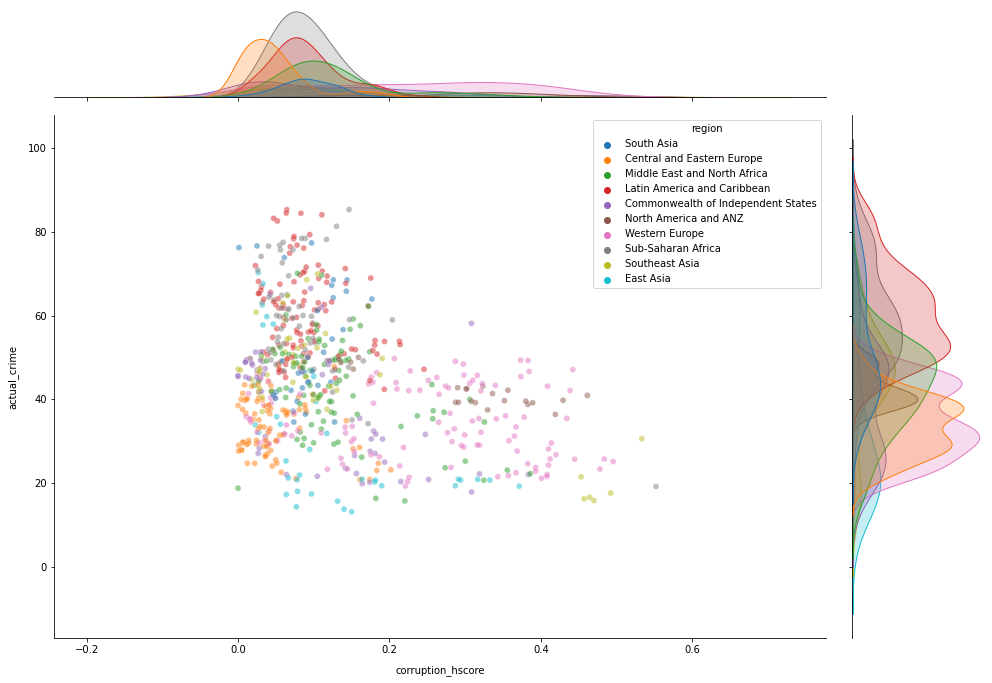

In [77]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="corruption_hscore", 
                           y="actual_crime", 
                           hue="region",
                           alpha=0.5)

data_to_sp.set_axis_labels("corruption_hscore", "actual_crime", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)